# <center><font color="red">PRAICP-1012-Pneumonia chest x-ray classification</center>

## PROBLEM STATEMENT
- To prepare a complete data analysis report on the given data.

- To build a deep learning model that classifies chest X-ray images as either Normal or Pneumonia using a CNN .



# DOMAIN ANALYSIS AND DATA INFORMATION

- **Pneumonia** is one of the leading causes of respiratory illness worldwide, causing a significant burden on public health systems. Pneumonia can be caused by various pathogens, including bacteria, viruses, and fungi. It results in inflammation and fluid accumulation in the lungs, impairing breathing and oxygen exchange. Chest X-rays are a common diagnostic tool used by healthcare professionals.

- This dataset contains chest X-ray images of patients diagnosed with pneumonia, organized into two classes: **normal** and **pneumonia**.

### CLASSES:

   1. **Normal**:

        This class contains chest X-ray images of healthy individuals with no signs of pneumonia. The lungs in these images appear clear and free from visible infections or inflammation.

   2. **Pneumonia**:

        This class contains chest X-ray images of patients diagnosed with pneumonia. These images often show signs of infection in the form of consolidation, opacities, and infiltrates in the lungs.


### DATASET DETAILS:

- **Training set**: 5216 images
   - **Normal**: 1341 images
   - **Pneumonia**: 3875 images
- **Testing set**: 624 images
   - **Normal**: 234 images
   - **Pneumonia**: 390 images
- **Validation set**: 16 images
   - **Normal**: 8 images
   - **Pneumonia**: 8 images



# 1. MOUNTING THE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. IMPORTING LIBRARIES

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report,confusion_matrix

# 3. EXTRACTING DATASET FROM ZIP FILE

In [ ]:
# with zipfile.ZipFile("/content/drive/MyDrive/Project/Chest-Xray-2 (1).zip", 'r') as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/Project")

# 4. BASIC CHECKS

### TRAINING

In [ ]:
train_dir = '/content/drive/MyDrive/Project/chest_xray/train'

normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
total_count = normal_count + pneumonia_count

print(f"NORMAL    : {normal_count}")
print(f"PNEUMONIA : {pneumonia_count}")
print(f"Total images in training set: {total_count}")

NORMAL    : 1341
PNEUMONIA : 3875
Total images in training set: 5216


### TESTING

In [ ]:
test_dir = '/content/drive/MyDrive/Project/chest_xray/test'

normal_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
total_count = normal_count + pneumonia_count

print(f"NORMAL    : {normal_count}")
print(f"PNEUMONIA : {pneumonia_count}")
print(f"Total images in testing set: {total_count}")

NORMAL    : 234
PNEUMONIA : 390
Total images in testing set: 624


### VALIDATION

In [ ]:
val_dir = '/content/drive/MyDrive/Project/chest_xray/val'

normal_count = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
total_count = normal_count + pneumonia_count

print(f"NORMAL    : {normal_count}")
print(f"PNEUMONIA : {pneumonia_count}")
print(f"Total images in validation set: {total_count}")

NORMAL    : 8
PNEUMONIA : 8
Total images in validation set: 16


# 5. VISUALIZING THE DATA

### NORMAL

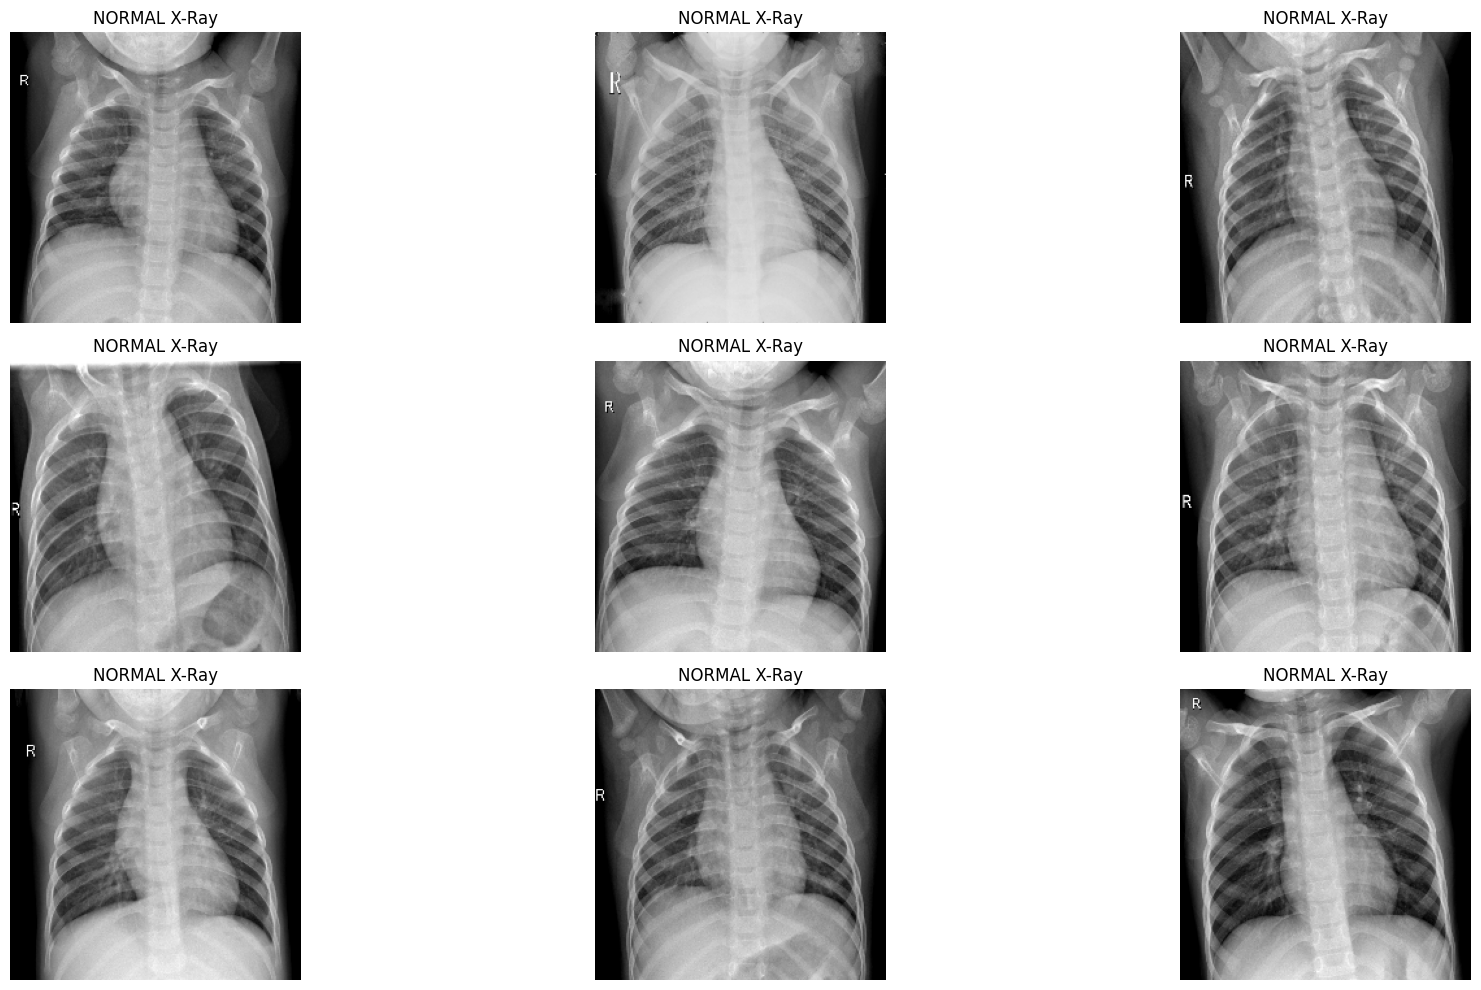

In [ ]:
normal = os.listdir("/content/drive/MyDrive/Project/chest_xray/train/NORMAL")
normal_dir = "/content/drive/MyDrive/Project/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    img_resizedd = cv2.resize(img, (224, 224))  # Resize to 224x224
    plt.imshow(img_resizedd, cmap='gray')
    plt.axis('off')
    plt.title("NORMAL X-Ray")

plt.tight_layout()
plt.show()

### PNEUMONIA

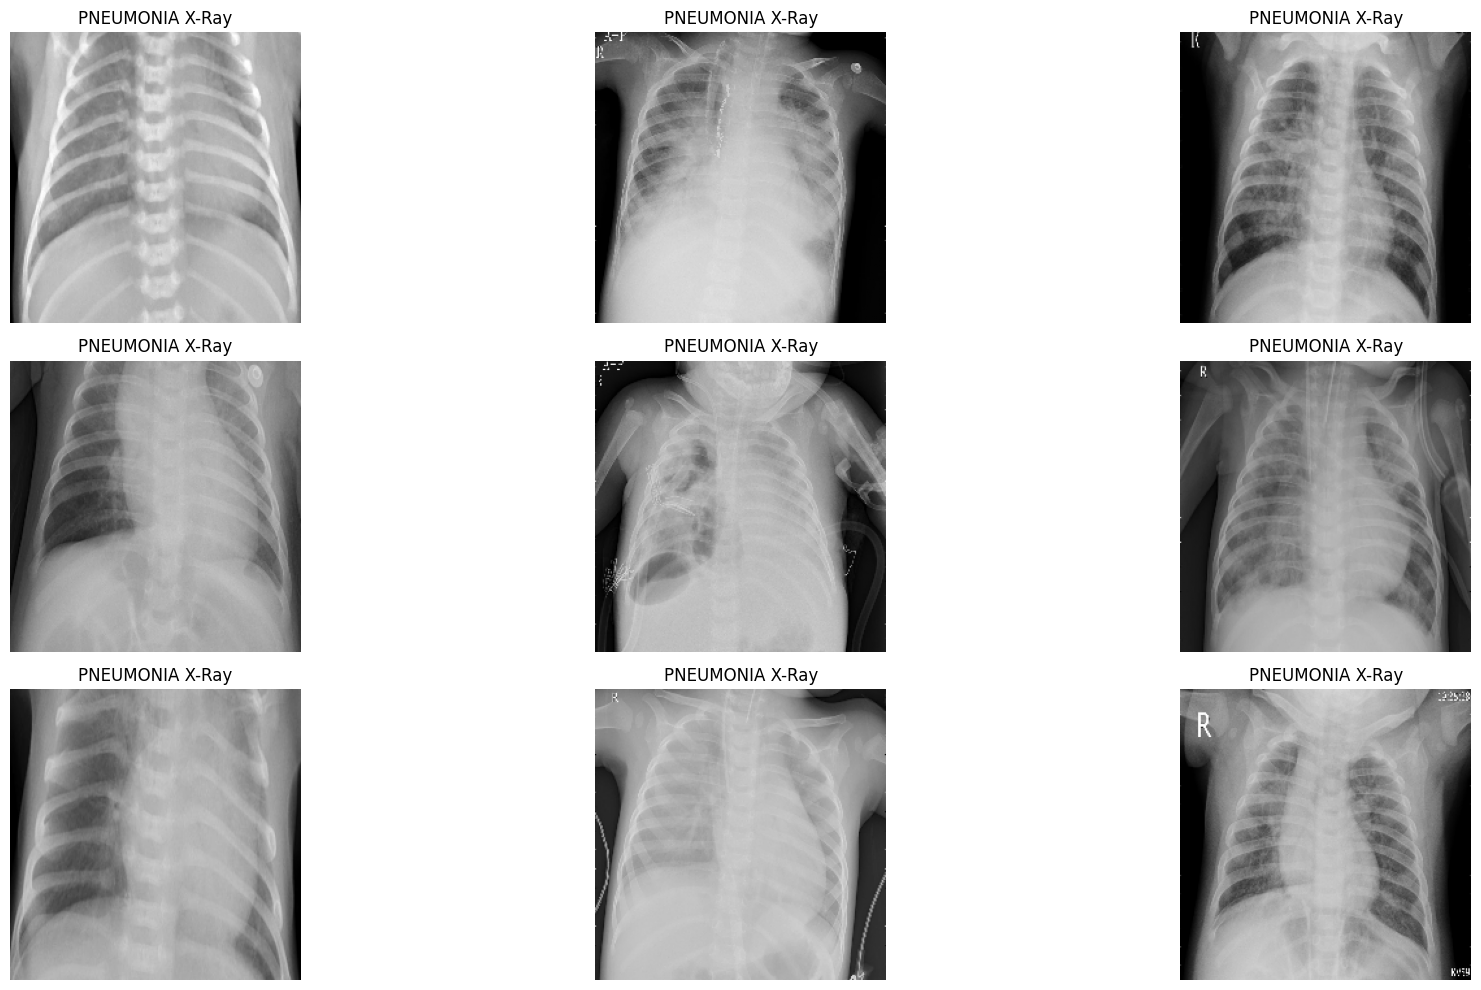

In [ ]:
pneumonia = os.listdir("/content/drive/MyDrive/Project/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/Project/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    img_resizedd = cv2.resize(img, (224, 224))  # Resize to 224x224
    plt.imshow(img_resizedd, cmap='gray')
    plt.axis('off')
    plt.title("PNEUMONIA X-Ray")

plt.tight_layout()
plt.show()

# 6. RESIZING IMAGES TO A UNIFORM SHAPE (224x224)

In [ ]:
labels = ['NORMAL', 'PNEUMONIA']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data,dtype="object")

# 7. DATA PREPROCESSING

In [ ]:
train = get_data(r'/content/drive/MyDrive/Project/chest_xray/train')
val = get_data(r'/content/drive/MyDrive/Project/chest_xray/val')
test = get_data(r'/content/drive/MyDrive/Project/chest_xray/test')

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []


for feature, label in train:
  x_train.append(np.array(feature))
  y_train.append(int(label))

for feature, label in test:
    x_test.append(np.array(feature))
    y_test.append(int(label))

for feature, label in val:
  x_val.append(np.array(feature))
  y_val.append(int(label))

# 8. NORMALIZING AND RESHAPING THE DATA

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# 9. CHECKING CLASS IMBALANCE

In [ ]:
train_dir = '/content/drive/MyDrive/Project/chest_xray/train'

normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))

print(f"NORMAL: {normal_count}")
print(f"PNEUMONIA: {pneumonia_count}")

imbalance_ratio = pneumonia_count / normal_count
print(f"Imbalance Ratio (PNEUMONIA/NORMAL): {imbalance_ratio:.2f}")

NORMAL: 1341
PNEUMONIA: 3875
Imbalance Ratio (PNEUMONIA/NORMAL): 2.89


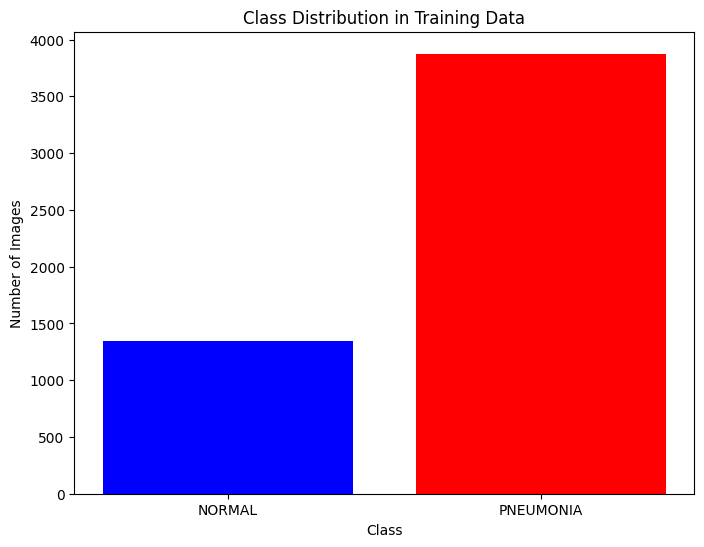

In [ ]:
# Plotting the graph
labels = ['NORMAL', 'PNEUMONIA']
counts = [normal_count, pneumonia_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'red'])
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

## INSIGHTS

- The dataset contains significantly more pneumonia images than normal ones, with an imbalance ratio of **2.89**.

- This imbalance could cause the model to favor predicting pneumonia over normal cases.

- To address this, **data augmentation** was applied to the normal images using techniques like flipping, rotating, and zooming. This helps balance the dataset and improve model performance.

# 10. DATA AUGMENTATION

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

# 11. MODEL CREATION

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 2,032,833 (7.75 MB)

 Trainable params: 2,031,745 (7.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

# 12.  MODEL COMPILATION AND FITTING

In [ ]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 39s 162ms/step - accuracy: 0.8019 - loss: 2.2715 - val_accuracy: 0.5000 - val_loss: 35.7333 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.8741 - loss: 0.3313 - val_accuracy: 0.5000 - val_loss: 28.2676 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9042 - loss: 0.2677
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.9042 - loss: 0.2674 - val_accuracy: 0.5000 - val_loss: 45.2800 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9466 - loss: 0.1593 - val_accuracy: 0.5000 - val_loss: 53.1014 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9502 - loss: 0.1521
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy:

# 13. MODEL EVALUATION

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("\n")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8719 - loss: 0.3698
Loss of the model is -  0.27001985907554626


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8719 - loss: 0.3698
Accuracy of the model is -  0.9038461446762085


In [ ]:
predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype("int").reshape(-1)
predictions

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 14. CONFUSION MATRIX

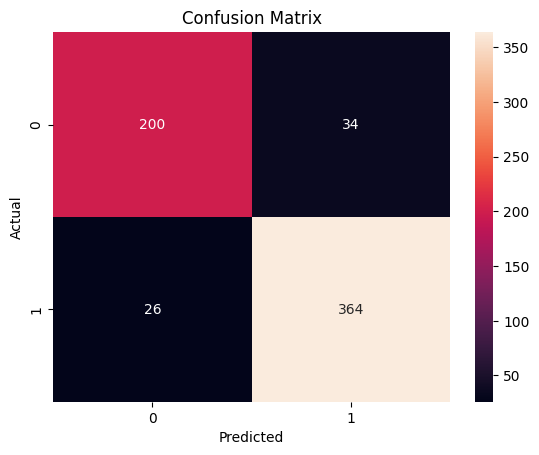

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 15. CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_test, predictions, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.88      0.85      0.87       234
   Pneumonia       0.91      0.93      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.89      0.90       624
weighted avg       0.90      0.90      0.90       624



# 16.TEST-IMAGE PREDICTIONS (GREEN: CORRECT, RED: INCORRECT)

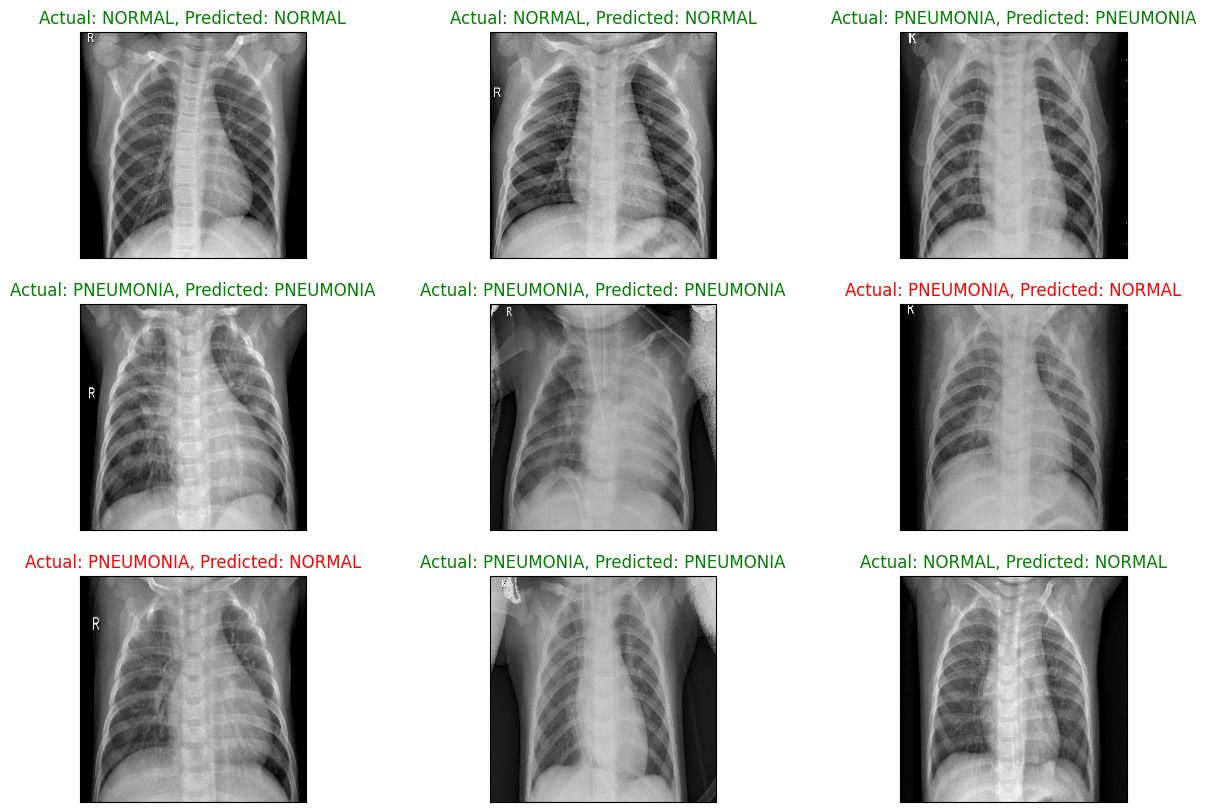

In [ ]:
# Class labels
class_labels = ['NORMAL', 'PNEUMONIA']

# Plotting
fig = plt.figure(figsize=(15, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    image = x_test[idx].squeeze()
    ax.imshow(image, cmap='gray')
    pred_label = predictions[idx]
    true_label = y_test[idx]
    ax.set_title("Actual: {}, Predicted: {}".format(
        class_labels[true_label], class_labels[pred_label]),
        color=("green" if pred_label == true_label else "red"))

# 17. CONCLUSION:

- The Convolutional Neural Network (CNN) developed for pneumonia detection achieved a test accuracy of **90.38%** and a loss of **0.27**, demonstrating effective learning and generalization on unseen chest X-ray images.

- These results suggest the model can reliably assist in distinguishing between normal and pneumonia cases.

- To further enhance performance, potential improvements include hyperparameter tuning, expanding the dataset, and leveraging transfer learning with pre-trained architectures such as VGG16 or ResNet50.